# Machine Learning Models


In [1]:
!pip install scikit-learn matplotlib seaborn graphviz pydot

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## **2. Supervised Learning Models**

**2.1 Linear Regression (Predict Numbers)**

Predicted house price: [160.]


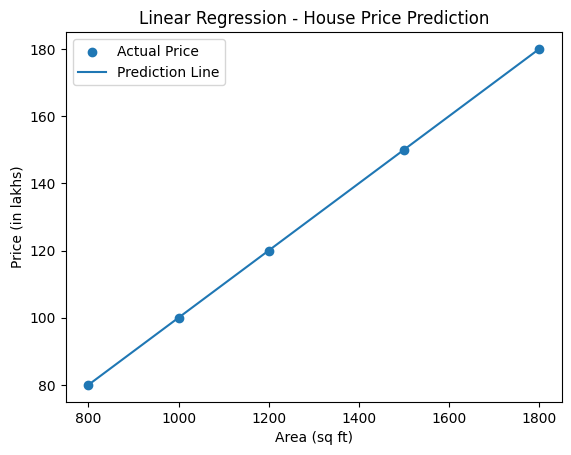

In [ ]:
from sklearn.linear_model import LinearRegression

area = np.array([800, 1000, 1200, 1500, 1800]).reshape(-1, 1)
price = np.array([80, 100, 120, 150, 180])

model = LinearRegression()
model.fit(area, price)
pred = model.predict([[1600]])
print("Predicted house price:", pred)

pred_line = model.predict(area)

plt.scatter(area, price, label="Actual Price")
plt.plot(area, pred_line, label="Prediction Line")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (in lakhs)")
plt.title("Linear Regression - House Price Prediction")
plt.legend()
plt.show()

**2.2 Logistic Regression (Classification)**

[1]


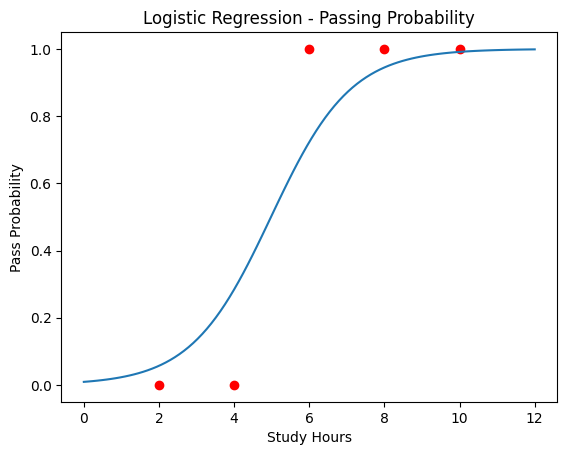

In [ ]:
from sklearn.linear_model import LogisticRegression

hours = np.array([2,4,6,8,10]).reshape(-1,1)
result = [0,0,1,1,1]

model = LogisticRegression()
model.fit(hours, result)
predict = model.predict([[7]])
x_range = np.linspace(0, 12, 100).reshape(-1,1)
y_pred = model.predict_proba(x_range)[:,1]

plt.plot(x_range, y_pred)
plt.scatter(hours, result, color='red')
plt.title("Logistic Regression - Passing Probability")
plt.xlabel("Study Hours")
plt.ylabel("Pass Probability")
plt.show()

**2.3 Decision Tree Classifier**

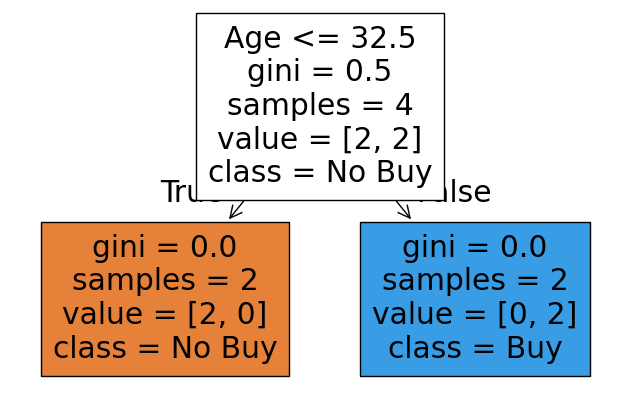

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = [[25, 30], [30, 40], [35, 60], [40, 80]]
y = [0, 0, 1, 1]

tree = DecisionTreeClassifier()
tree.fit(X, y)


plt.figure(figsize=(8,5))
plot_tree(tree, filled=True, feature_names=["Age", "Income"], class_names=["No Buy", "Buy"])
plt.show()

**2.4 Random Forest Classifier**

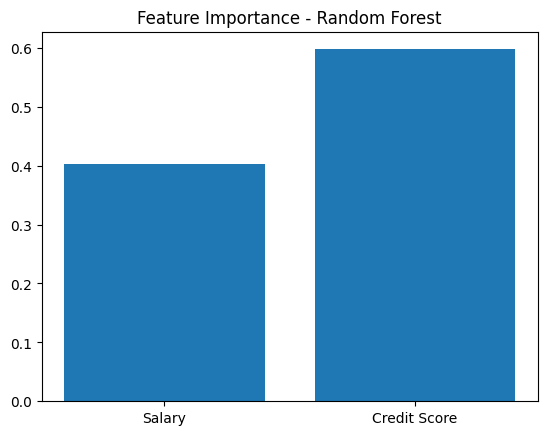

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = np.array([[50000,1],[30000,0],[80000,1],[20000,0]])
y = [1,0,1,0]

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

importance = rf_model.feature_importances_

plt.bar(["Salary", "Credit Score"], importance)
plt.title("Feature Importance - Random Forest")
plt.show()

**2.5 Support Vector Machine (SVM)**

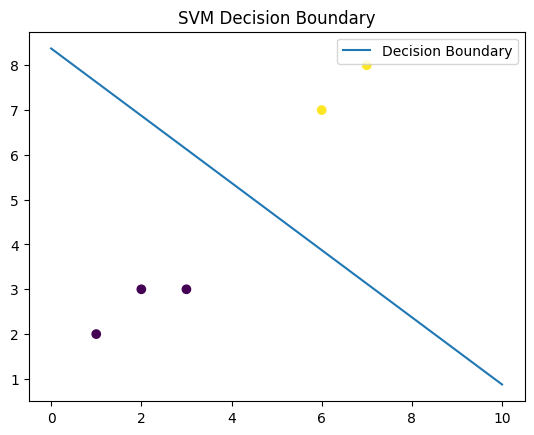

In [ ]:
from sklearn import svm

X = np.array([[1,2],[2,3],[3,3],[6,7],[7,8]])
y = np.array([0,0,0,1,1])

model = svm.SVC(kernel='linear')
model.fit(X, y)

plt.scatter(X[:,0], X[:,1], c=y)
w = model.coef_[0]
b = model.intercept_[0]
x = np.linspace(0,10)
y_line = -(w[0]/w[1])*x - b/w[1]
plt.plot(x, y_line, label="Decision Boundary")
plt.legend()
plt.title("SVM Decision Boundary")
plt.show()

# **3. Unsupervised Learning**
**3.1 K-Means Clustering**

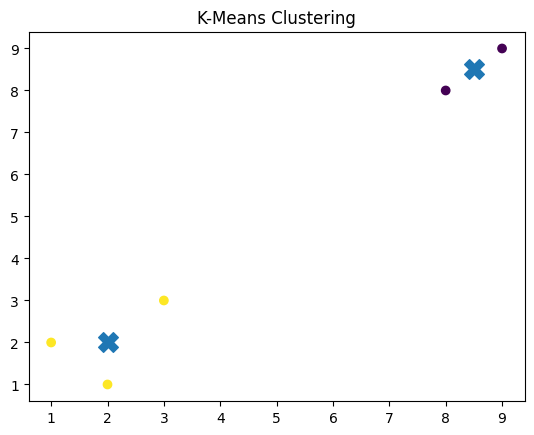

In [ ]:
from sklearn.cluster import KMeans

X = np.array([[1,2],[2,1],[3,3],[8,8],[9,9]])

kmeans = KMeans(n_clusters=2, n_init='auto')
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, marker='X')
plt.title("K-Means Clustering")
plt.show()

**3.2 PCA (Dimensionality Reduction)**


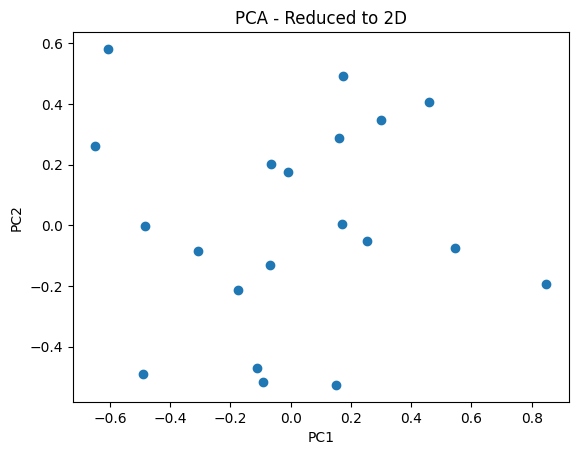

In [ ]:
from sklearn.decomposition import PCA

np.random.seed(42)
X = np.random.rand(20, 5)

pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

plt.scatter(reduced[:,0], reduced[:,1])
plt.title("PCA - Reduced to 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**4. Reinforcement Learning (Table Visualization)**

In [ ]:
Q = np.zeros((5, 2))

alpha = 0.1
gamma = 0.9

state = 2
action = 1
reward = 10
next_state = 3

Q[state, action] = Q[state, action] + alpha * (
    reward + gamma*np.max(Q[next_state]) - Q[state, action]
)

import pandas as pd
pd.DataFrame(Q, columns=["Action 0", "Action 1"])


,Action 0,Action 1
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


**Mini Project: House Price Prediction (Regression)**

**1. Load Dataset**

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Show first rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Feature Selection & Train–Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("MedHouseVal", axis=1)   # Features
y = df["MedHouseVal"]                # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Train Model (Linear Regression)**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


**4. Evaluate Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.5558915986952444, 0.5757877060324508)

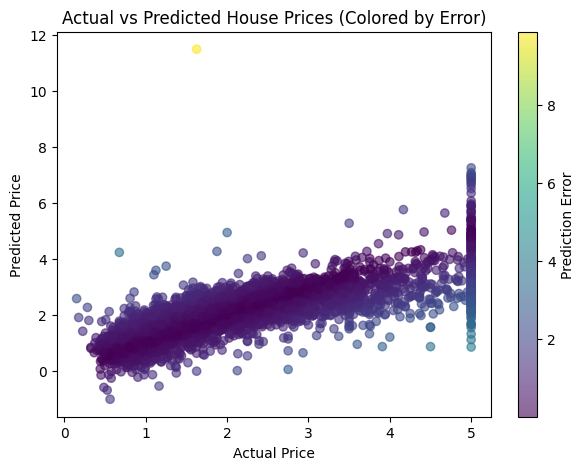

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

errors = np.abs(y_test - y_pred)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, c=errors, alpha=0.6)
plt.colorbar(label="Prediction Error")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Colored by Error)")
plt.show()



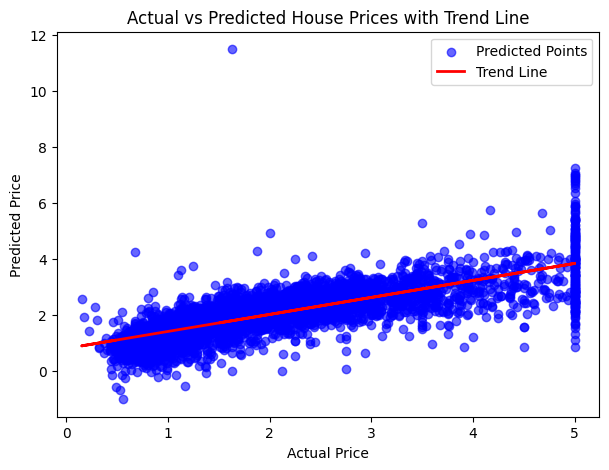

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,5))

# Scatter points (blue)
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted Points")

# Trend line (red)
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red", linewidth=2, label="Trend Line")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices with Trend Line")
plt.legend()
plt.show()


**6. Visualization: Residual Plot**

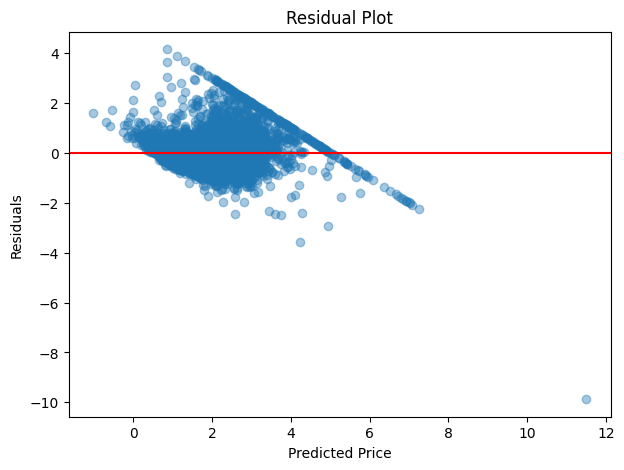

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
